In [121]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [122]:
df = pd.read_csv('./科三_hours_20171001_20171014.csv')
df.head()
df.columns

Index(['﻿時  間', '區 域', '館 舍 別', '迴 路 別', '用電別', '用電量(單位:度)'], dtype='object')

In [123]:
df_te = df[['﻿時  間','用電量(單位:度)']]
print(df_te.describe())
print(df_te.shape)

        用電量(單位:度)
count  336.000000
mean   431.711310
std     75.689763
min    333.000000
25%    377.000000
50%    405.000000
75%    458.500000
max    686.000000
(336, 2)


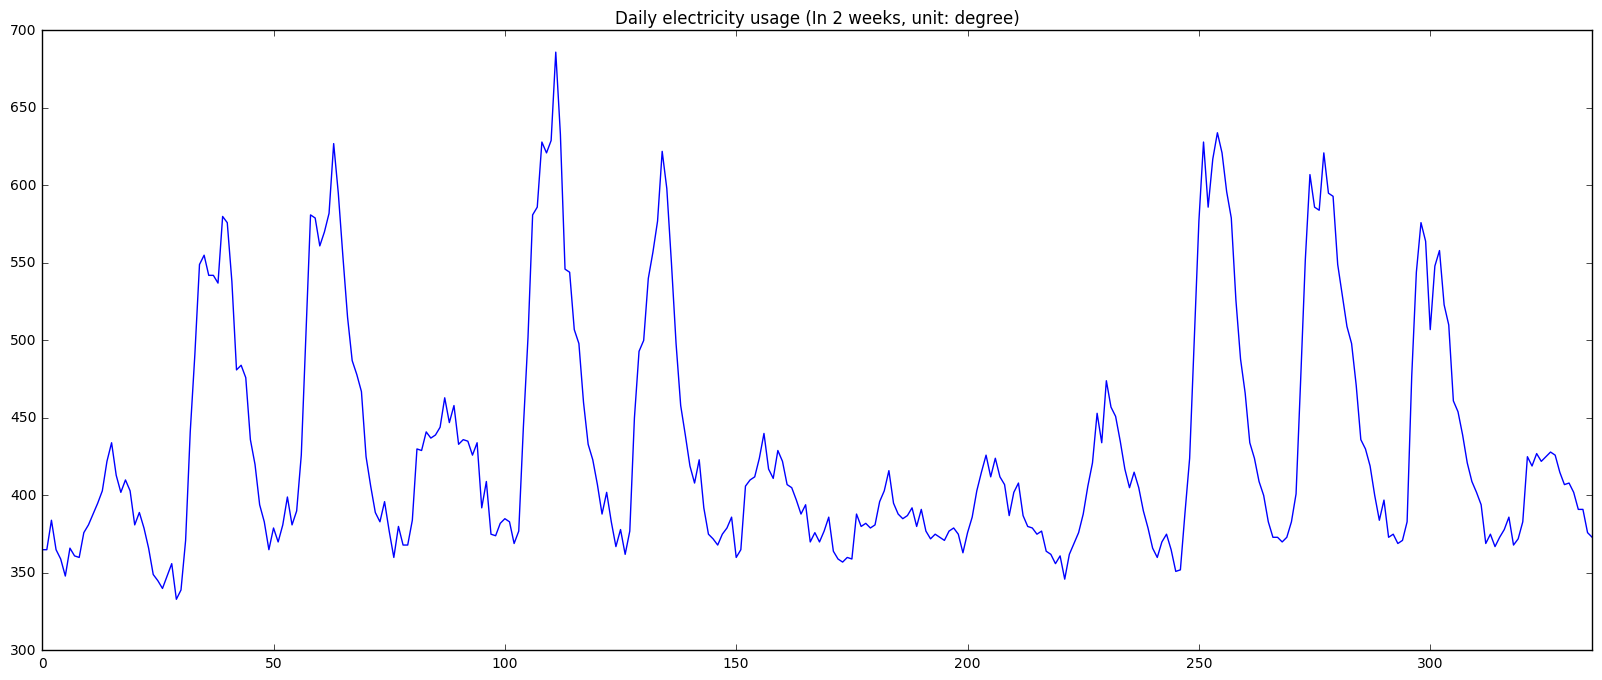

In [124]:
# df4 = df2[np.abs(df2[['用電量(單位:度)']] - df2[['用電量(單位:度)']].mean())<=(5*df2[['用電量(單位:度)']].std())]
df_te['用電量(單位:度)'].plot.line()
matplotlib.pyplot.title('Daily electricity usage (In 2 weeks, unit: degree)')

In [133]:
df5 = df_te.rename(index=str, columns={'﻿時  間':"Date_Time"})
df5 = df5.rename(index=str, columns={'用電量(單位:度)':"Usage(In degree)"})
df5.columns

Index(['Date_Time', 'Usage(In degree)'], dtype='object')

In [134]:
# df2 = df2.set_index('﻿時  間')
# df2.index.rename('Date_Time')
# df2.groupby(pd.TimeGrouper('D')).mean().dropna()


# pd.Series(df5.Date_Time.str[10:16])
df5.loc[:,'Hours'] = pd.Series(df5.Date_Time.str[10:16])
df_teh = df5
df_teh.head()

,Date_Time,Usage(In degree),Hours
0,2017/10/01 00:00,365.0,00:00
1,2017/10/01 01:00,365.0,01:00
2,2017/10/01 02:00,384.0,02:00
3,2017/10/01 03:00,365.0,03:00
4,2017/10/01 04:00,359.0,04:00


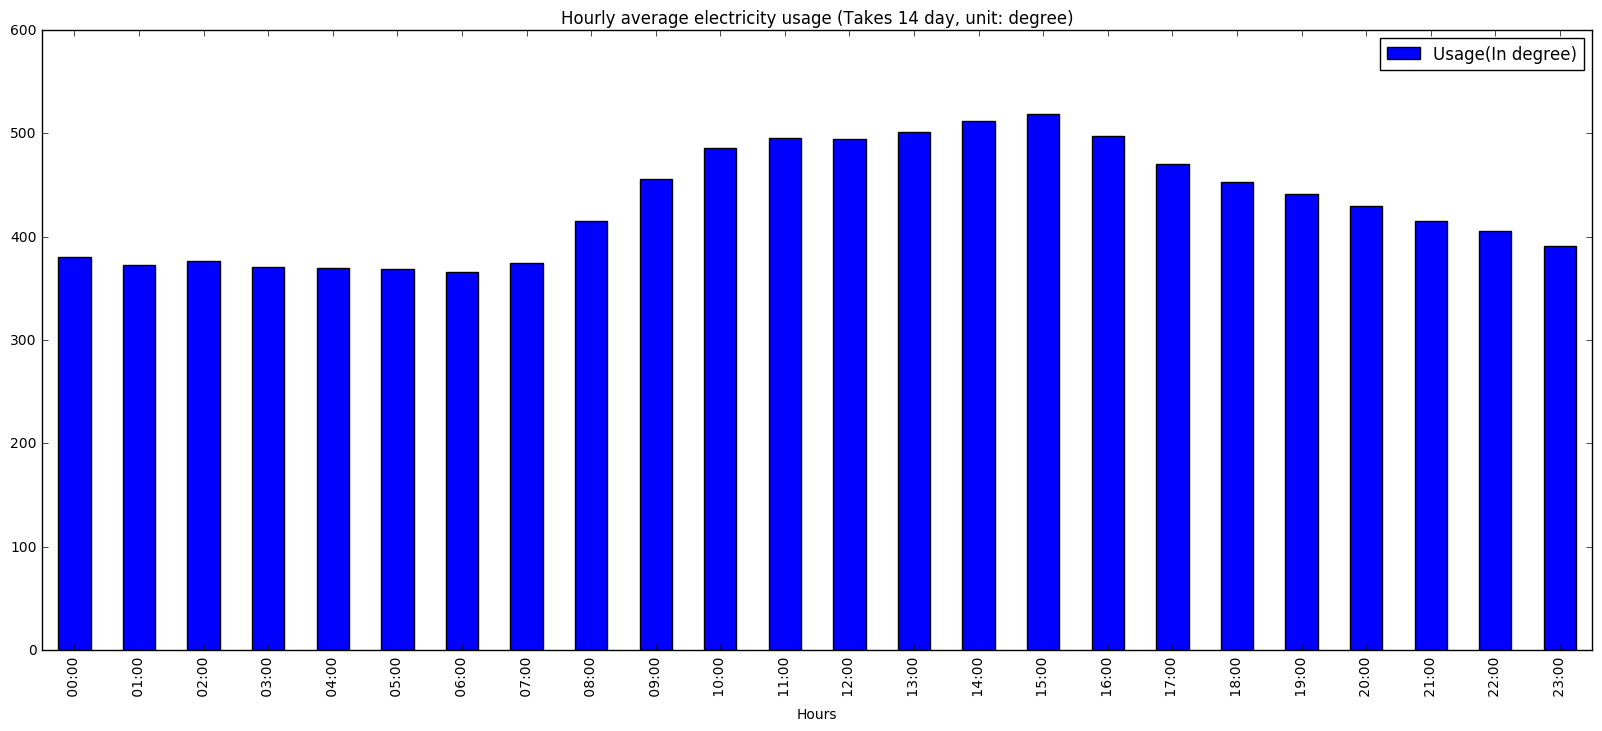

In [135]:
#科三每小時用電量
df_gpby = df_teh.groupby(['Hours'])
df_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

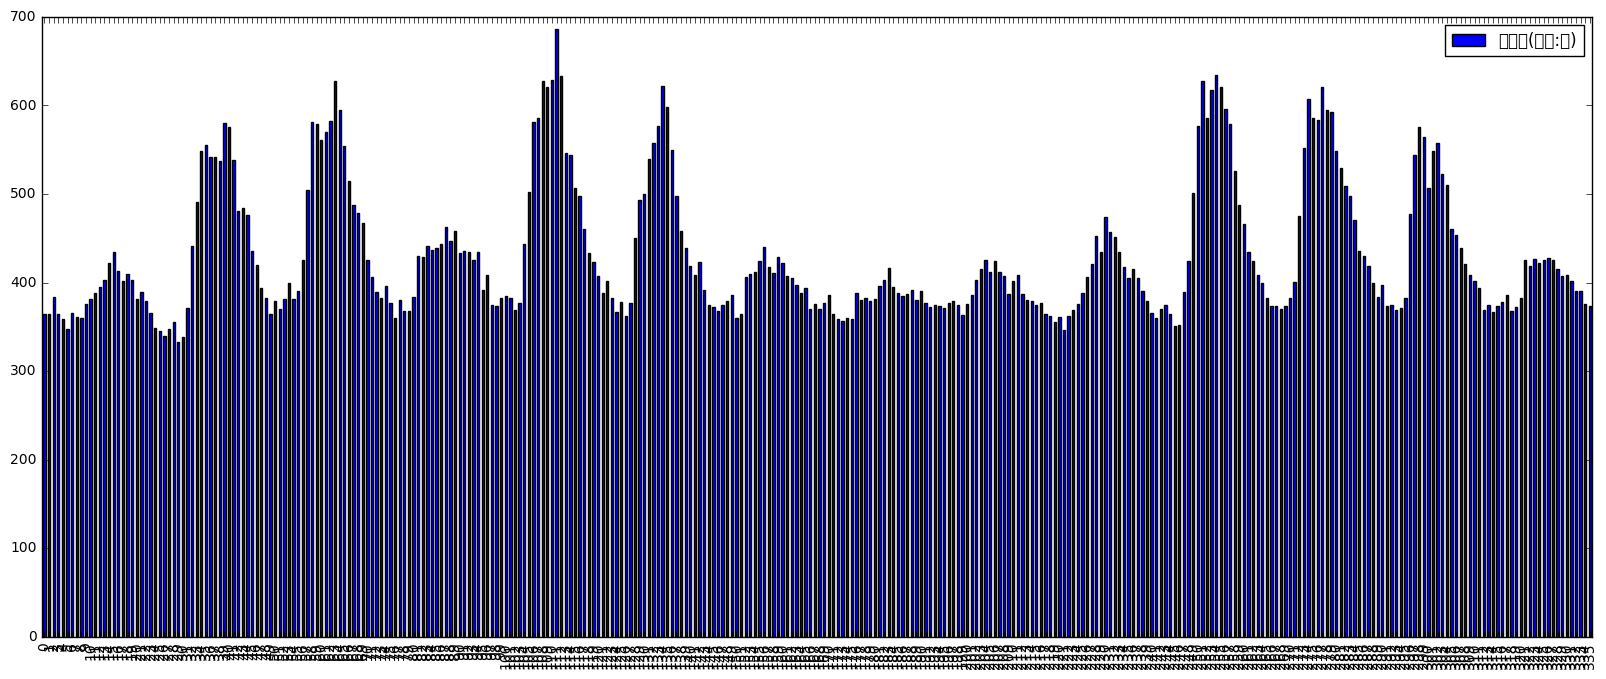

In [136]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')